* The provided data file (tab-delimited text) contains the single-cell gene expression profiles of pancreatic endocrinogenesis. There are 3696 cells and 2000 genes. 
    * The first row is the ID of each cell. The second row shows the annotated cell type of each cell. 
    * The first column is the gene name. In the remaining rows and columns, each element represents the expression level of each gene in each cell. 
* Use different dimension reduction algorithms (PCA, t-SNE, and UMAP) to visualize the data. Try to color each cell according to its cell type.
    * PCA with the 2000 genes
    * tSNE with the top 30 PCs (reduced from 2000 genes)
    * UMAP with the top 30 PCs (reduced from 2000 genes)
    * UMAP with the 2000 genes
* Compare the results of the different algorithms and discuss the strengths and weaknesses of each algorithm. For example, you can discuss how well each algorithm separates the different clusters of data, how well it preserves the global structure of the data, and how well it preserves the local structure of the data.
* Try adjusting the parameters of each algorithm and compare the results to the original plots. For example, you can try adjusting the `perplexity` parameter in t-SNE or the `n_neighbors` parameter in UMAP and see how these changes affect the visualization of the data.
* Write a short report summarizing your findings, including the original plots, the plots with adjusted parameters, and a discussion of the strengths and weaknesses of each algorithm.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
plt.style.use("ggplot")

In [55]:
df = pd.read_csv("data/scPE.tsv", sep="\t", dtype=object)
label = pd.DataFrame(df.iloc[0, 1:].values, columns=["Label"])
df = df.drop(0, axis=0)
df = df.set_index("CellID")
label.index = df.columns
df = df.T
df = df.astype(np.float64)
df = df.fillna(df.min())
normalized_df = (df - df.min())/df.max()

In [17]:
unique_class = pd.unique(label.values.flatten())
n_class = len(unique_class)
n_class

8

Text(0, 0.5, 'PC2 (14.93%)')

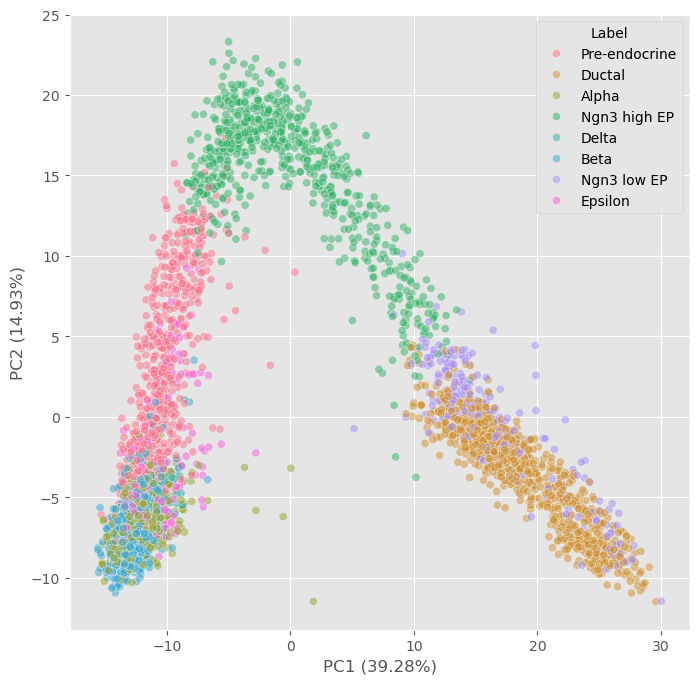

In [69]:
# 在PCA中，我們可以看到主要被分成四個部分，但其中會有些不同種類的混雜，且在PC1僅能解釋39.29%。
# 代表可能資料是非線性的，故不能將數據點分得很開。

from sklearn.decomposition import PCA
import seaborn as sns
pca30 = PCA(n_components=30)
pca30_result = pca30.fit_transform(df)
pca_result_df = pd.DataFrame(pca30_result[:, :2], columns=["pc1", "pc2"], index=df.index)
pca_result_df = pd.concat((pca_result_df, label), axis=1)
explained_variance = pca30.explained_variance_/pca30.explained_variance_.sum()
plt.figure(figsize=(8, 8))
sns.scatterplot(pca_result_df, x="pc1", y="pc2", hue="Label", alpha=0.5)
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")

In [42]:
# 存放不同參數的t-sne
result_dict = {}  
for i, perplexity in enumerate([3, 30, 100, 200, len(df)/n_class]):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_result = tsne.fit_transform(pca30_result)
    tsne_result_df = pd.DataFrame(tsne_result[:, :2], columns=["pc1", "pc2"], index=df.index)
    tsne_result_df = pd.concat((tsne_result_df, label), axis=1)
    result_dict[perplexity] = tsne_result_df


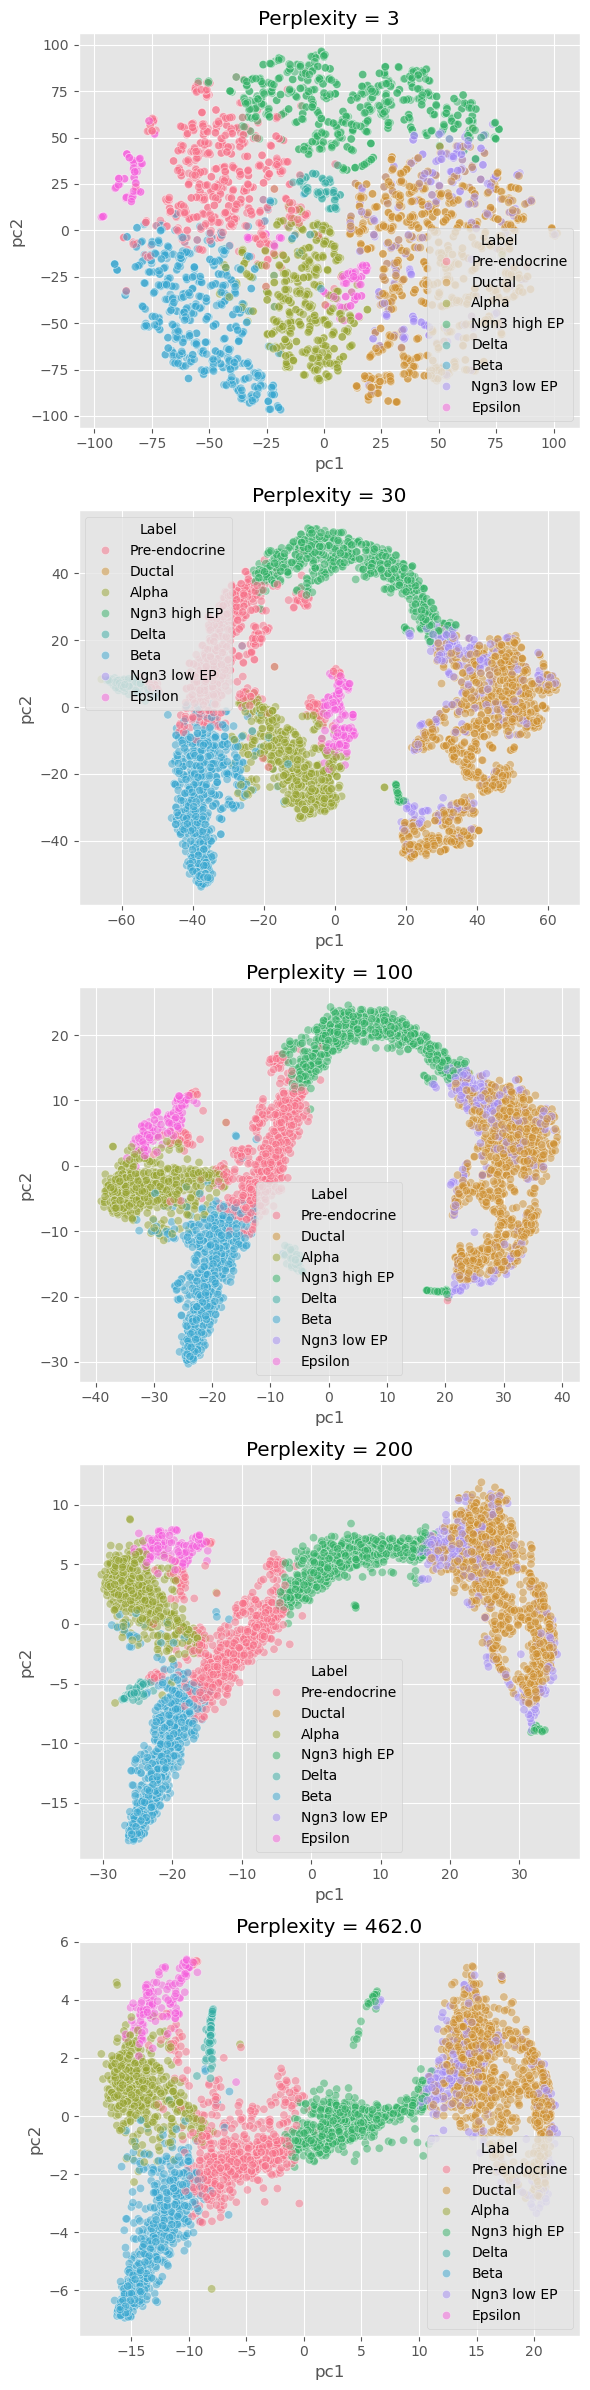

In [43]:
# 較大的perplexity比較能抓出整體的趨勢
fig, axs = plt.subplots(5, 1, figsize=(6, 24))
fig.subplots_adjust(hspace=0)

# 預設鄰居（k）為30
for i, perplexity in enumerate(result_dict):
    sns.scatterplot(data=result_dict[perplexity], x="pc1", y="pc2", hue="Label", alpha=0.5, ax=axs[i])
    axs[i].set_title(f"Perplexity = {perplexity}")
plt.tight_layout()
# Show the plots
plt.show()

In [94]:


# Apply pc30 UMAP


# Apply all UMAP


In [47]:
import umap
# UMAP也能將數據點分開，且圖形較tsne緊湊一些
umap_30_result_dict = {}
for i, n_neighbors in enumerate([3, 30, 100, 200, len(df)/n_class]):
    umap_30_result = umap.UMAP(n_components=2, n_neighbors=n_neighbors).fit_transform(pca30_result)
    umap_30_result_df = pd.DataFrame(umap_30_result[:, :2], columns=["pc1", "pc2"], index=df.index)
    umap_30_result_df = pd.concat((umap_30_result_df, label), axis=1)
    umap_30_result_dict[n_neighbors] = umap_30_result_df


/Users/blue/miniconda3/envs/bioinfo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


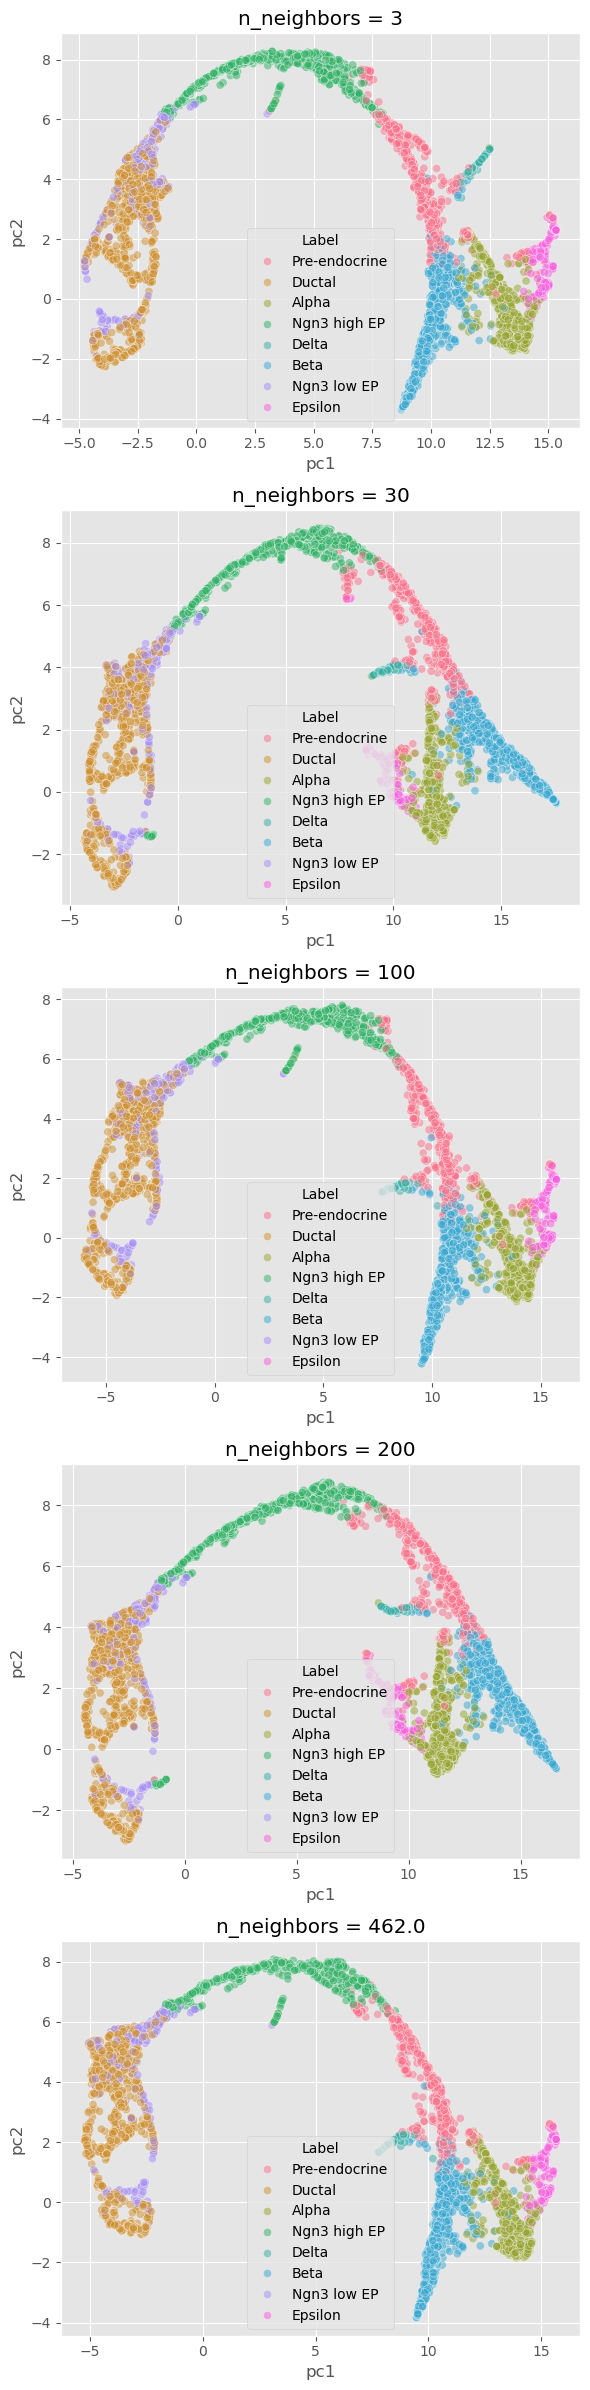

In [49]:
fig, axs = plt.subplots(5, 1, figsize=(6, 24))
fig.subplots_adjust(hspace=0)

for i, n_neighbors in enumerate(result_dict):
    sns.scatterplot(data=umap_30_result_dict[n_neighbors], x="pc1", y="pc2", hue="Label", alpha=0.5, ax=axs[i])
    axs[i].set_title(f"n_neighbors = {n_neighbors}")
plt.tight_layout()
plt.show()


<Axes: xlabel='pc1', ylabel='pc2'>

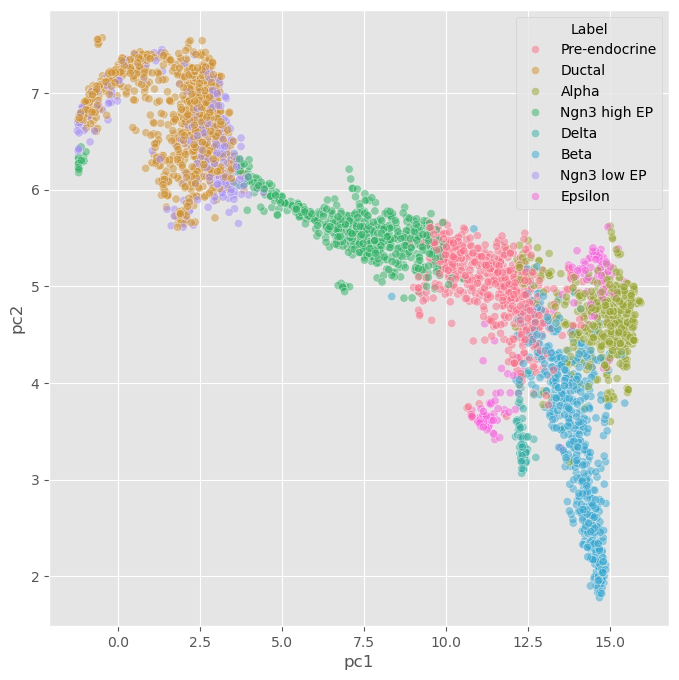

In [68]:
umap_2000_result = umap.UMAP(n_components=2).fit_transform(normalized_df)
umap_2000_result_df = pd.DataFrame(umap_2000_result[:, :2], columns=["pc1", "pc2"], index=df.index)
umap_2000_result_df = pd.concat((umap_2000_result_df, label), axis=1)
plt.figure(figsize=(8, 8))
sns.scatterplot(data=umap_2000_result_df, x="pc1", y="pc2", hue="Label", alpha=0.5)

兩種算法的差別：
T-sne基於將在低維做出與高維類似的機率分佈（t）來達成降維，速度較慢
UMAP則是透過在高維中將資料視為一個manifold，透過在高維空間建立一有相圖後攤平來達成降維，速度較快
其中在本次資料中，我認為t-sne在資料呈現上表現更佳，因為能明確地將大部分類別分開
但相較之下速度慢得多。

參數調整差別：
參數選用了由小到大各五個參數，其中最大的值是用總cell數除以類別數。
在t-sne上參數調整影響較大，明顯能看出neighbors較高能找出樣本中的全局特徵，但亦不可過高，會讓其將所有點視為同一分群